In [5]:
import tensorflow as tf

In [2]:
print(tf.config.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [3]:
print(tf.test.is_built_with_cuda())

True


In [1]:
import os
import pathlib
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import Sequential, layers, models
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing import image

In [7]:
train_data_path = "../data/Train"

In [3]:
BATCH_SIZE = 32
IMAGE_SIZE = 256
EPOCHS=50
INPUT_SHAPE=(BATCH_SIZE,IMAGE_SIZE,IMAGE_SIZE,3)

In [8]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    train_data_path,
    seed=42,
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 23619 files belonging to 18 classes.


In [9]:
class_names = dataset.class_names
class_names

['freshapples',
 'freshbanana',
 'freshbittergroud',
 'freshcapsicum',
 'freshcucumber',
 'freshokra',
 'freshoranges',
 'freshpotato',
 'freshtomato',
 'rottenapples',
 'rottenbanana',
 'rottenbittergroud',
 'rottencapsicum',
 'rottencucumber',
 'rottenokra',
 'rottenoranges',
 'rottenpotato',
 'rottentomato']

In [10]:
import pickle 

with open("class_name.pkl", "wb") as f:
    pickle.dump(class_names, f)

In [9]:
train_ds = dataset.take(655)
val_ds = dataset.skip(655)

len(train_ds), len(val_ds)

(655, 84)

In [10]:
layer1 = tf.keras.Sequential([
  layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
  layers.experimental.preprocessing.Rescaling(1./255),
])

data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2),
])

In [11]:
model = models.Sequential([
    layer1,
    data_augmentation,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=INPUT_SHAPE),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(len(class_names), activation='softmax'),
])

model.build(input_shape=INPUT_SHAPE)

In [12]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential (Sequential)      (32, 256, 256, 3)         0         
_________________________________________________________________
sequential_1 (Sequential)    (32, 256, 256, 3)         0         
_________________________________________________________________
conv2d (Conv2D)              (32, 254, 254, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (32, 127, 127, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (32, 125, 125, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (32, 62, 62, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (32, 60, 60, 64)         

In [13]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [14]:
early_stopping = EarlyStopping(monitor='val_accuracy',
                               patience=3,
                               restore_best_weights=True)

In [15]:
history = model.fit(
    train_ds,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    callbacks=[early_stopping])

Epoch 1/50
655/655 [==============================] - 274s 398ms/step - loss: 1.8580 - accuracy: 0.3769 - val_loss: 0.9809 - val_accuracy: 0.6743
Epoch 2/50
655/655 [==============================] - 126s 191ms/step - loss: 0.9765 - accuracy: 0.6649 - val_loss: 0.6277 - val_accuracy: 0.7649
Epoch 3/50
655/655 [==============================] - 126s 192ms/step - loss: 0.7201 - accuracy: 0.7427 - val_loss: 0.5419 - val_accuracy: 0.7969
Epoch 4/50
655/655 [==============================] - 126s 191ms/step - loss: 0.6200 - accuracy: 0.7790 - val_loss: 0.4736 - val_accuracy: 0.8116
Epoch 5/50
655/655 [==============================] - 126s 191ms/step - loss: 0.5523 - accuracy: 0.7972 - val_loss: 0.5020 - val_accuracy: 0.8199
Epoch 6/50
655/655 [==============================] - 126s 192ms/step - loss: 0.5162 - accuracy: 0.8122 - val_loss: 0.4721 - val_accuracy: 0.8259
Epoch 7/50
655/655 [==============================] - 121s 185ms/step - loss: 0.4857 - accuracy: 0.8216 - val_loss: 0.4291 -

In [16]:
def loss_curve(history):

  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label="Training_Loss")
  plt.plot(epochs, val_loss, label="Val_Loss")
  plt.title("Loss")
  plt.xlabel("Epochs")
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label="Training_Accuracy1")
  plt.plot(epochs, val_accuracy, label="Val_Accuracy")
  plt.title("Loss")
  plt.xlabel("Epochs")
  plt.legend()

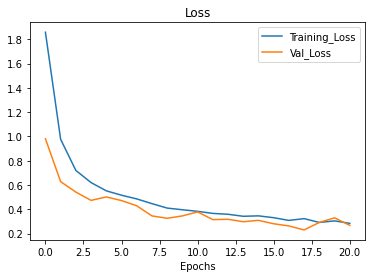

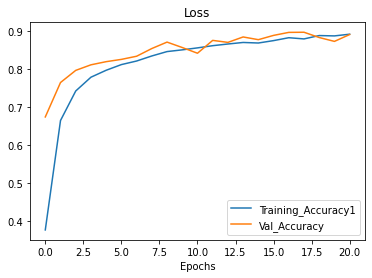

In [17]:
loss_curve(history)

In [32]:
def write_model_metrics(history):
    file_path = 'model_metrics.txt'

    if not os.path.exists(file_path):
        mode = 'w'  
    else:
        mode = 'a'  

    with open(file_path, mode) as f:
        val_loss = history.history['val_loss']
        val_acc = history.history['val_accuracy']
        for i in range(len(val_loss)):
            f.write(f'Epoch {i+1}: Validation Loss = {val_loss[i]}, Validation Accuracy = {val_acc[i]}\n')


In [ ]:
write_model_metrics(history)

In [19]:
model_ver=1
model.save(f"model/{model_ver}")

INFO:tensorflow:Assets written to: model/1\assets


# Experiments

In [21]:
IMAGE_SIZE = 256
INPUT_SHAPE = (IMAGE_SIZE, IMAGE_SIZE, 3)  
NUM_CLASSES = len(class_names)
BATCH_SIZE = 32
EPOCHS = 100

In [22]:
new_data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2),
    layers.experimental.preprocessing.RandomZoom(0.2),
    layers.experimental.preprocessing.RandomContrast(0.2),
])

In [23]:
model_1 = models.Sequential([
    layers.Input(shape=INPUT_SHAPE),
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1./255),
    new_data_augmentation,
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(256, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(512, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(512, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(1024, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(NUM_CLASSES, activation='softmax'),
])

model_1.build(input_shape=INPUT_SHAPE)

In [24]:
model_1.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resizing_1 (Resizing)        (None, 256, 256, 3)       0         
_________________________________________________________________
rescaling_1 (Rescaling)      (None, 256, 256, 3)       0         
_________________________________________________________________
sequential_3 (Sequential)    (None, 256, 256, 3)       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 254, 254, 64)      1792      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 127, 127, 64)      0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 125, 125, 128)     73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 62, 62, 128)      

In [25]:
model_1.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [26]:
early_stopping = tf.keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True),
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(factor=0.1, patience=5, min_lr=0.00001)

In [27]:
history_1 = model_1.fit(
    train_ds,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    callbacks=[early_stopping, reduce_lr]
)

Epoch 1/100
655/655 [==============================] - 272s 409ms/step - loss: 1.6703 - accuracy: 0.4190 - val_loss: 0.8574 - val_accuracy: 0.6984
Epoch 2/100
655/655 [==============================] - 272s 416ms/step - loss: 0.8539 - accuracy: 0.7000 - val_loss: 0.5933 - val_accuracy: 0.7619
Epoch 3/100
655/655 [==============================] - 273s 416ms/step - loss: 0.6564 - accuracy: 0.7616 - val_loss: 0.5217 - val_accuracy: 0.8022
Epoch 4/100
655/655 [==============================] - 273s 417ms/step - loss: 0.5365 - accuracy: 0.8049 - val_loss: 0.3711 - val_accuracy: 0.8454
Epoch 5/100
655/655 [==============================] - 273s 416ms/step - loss: 0.4765 - accuracy: 0.8242 - val_loss: 0.3537 - val_accuracy: 0.8597
Epoch 6/100
655/655 [==============================] - 272s 415ms/step - loss: 0.4297 - accuracy: 0.8381 - val_loss: 0.3133 - val_accuracy: 0.8684
Epoch 7/100
655/655 [==============================] - 273s 416ms/step - loss: 0.4070 - accuracy: 0.8475 - val_loss: 0

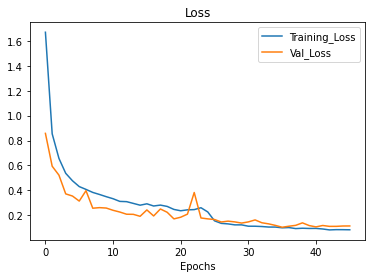

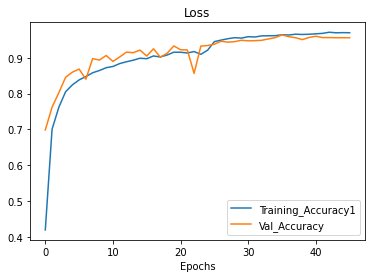

In [28]:
loss_curve(history_1)

In [33]:
write_model_metrics(history_1)

In [34]:
model_ver=2
model_1.save(f"model/{model_ver}")

INFO:tensorflow:Assets written to: model/2\assets


In [59]:
test_data_path = "data/Test"

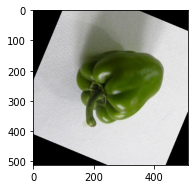

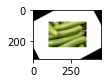

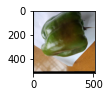

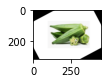

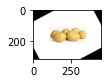

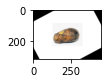

In [77]:
# Visualizing the test images
plt.figure(figsize=(12,6))
img_files = [file for file in os.listdir(test_data) if file.endswith(('.png', '.jpg', '.jpeg'))]

for img in img_files:
  img_path = os.path.join(test_data, img)

  plt.subplot(1,5,1)
  img = mpimg.imread(img_path)
  plt.imshow(img)

  plt.tight_layout()
  plt.show()

In [56]:
img_files

['capsicum3_0.jpg_0_389.jpg',
 'c_f036.png',
 'IMG_20200901_181735.jpg_0_745.jpg',
 'o_f002.png',
 'p_f002.png',
 'p_r003.png']

In [63]:
def preprocess_image(image_path, target_size=(256, 256)):
    img = image.load_img(image_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  
    return img_array

def predict_image(image_path, model):
    img_array = preprocess_image(image_path)
    predictions = model_1.predict(img_array)
    predicted_class_index = np.argmax(predictions[0])
    predicted_class = class_names[predicted_class_index]
    confidence = predictions[0][predicted_class_index]
    return predicted_class, confidence

In [66]:
# Example usage:
image_path = 'data/Test/p_r003.png'  # Replace 'path_to_your_test_image.jpg' with the actual path to your test image
predicted_class, confidence = predict_image(image_path, model)
print("Predicted Class:", predicted_class)
print("Confidence:", confidence)

Predicted Class: rottenpotato
Confidence: 0.9592323


In [75]:
def predict_img(img_path, model, target_size=(256,256), class_names=class_names):
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    
    predictions = model_1.predict(img_array)
    predicted_class_index = np.argmax(predictions[0])
    
    predicted_class = class_names[predicted_class_index]
    confidence = predictions[0][predicted_class_index]
    return predicted_class, confidence

In [76]:
for i in enumerate(img_files):
    img_path = os.path.join(test_data_path, i[1])
    
    predicted_class, confidence = predict_img(img_path=img_path, model=model_1)
    print(f"Predicted Class: {predicted_class}")
    print(f"Confidence: {confidence}")

Predicted Class: freshcapsicum
Confidence: 0.9999918937683105
Predicted Class: freshokra
Confidence: 0.5413051247596741
Predicted Class: rottencapsicum
Confidence: 1.0
Predicted Class: freshokra
Confidence: 0.8670524954795837
Predicted Class: freshpotato
Confidence: 0.9989540576934814
Predicted Class: rottenpotato
Confidence: 0.9592322707176208


## Conlusion: The predictions are quite accurate